In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/bodyPerformance.csv')

In [ ]:
df.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [ ]:
df.shape

(13393, 12)

In [ ]:
df.isnull().sum()

age                        0
gender                     0
height_cm                  0
weight_kg                  0
body fat_%                 0
diastolic                  0
systolic                   0
gripForce                  0
sit and bend forward_cm    0
sit-ups counts             0
broad jump_cm              0
class                      0
dtype: int64

In [ ]:
df['class'].value_counts()

C    3349
D    3349
A    3348
B    3347
Name: class, dtype: int64

In [ ]:
df['gender'].value_counts()

M    8467
F    4926
Name: gender, dtype: int64

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,13393.0,36.775106,13.625639,21.0,25.0,32.0,48.0,64.0
height_cm,13393.0,168.559807,8.426583,125.0,162.4,169.2,174.8,193.8
weight_kg,13393.0,67.447316,11.949666,26.3,58.2,67.4,75.3,138.1
body fat_%,13393.0,23.240165,7.256844,3.0,18.0,22.8,28.0,78.4
diastolic,13393.0,78.796842,10.742033,0.0,71.0,79.0,86.0,156.2
systolic,13393.0,130.234817,14.713954,0.0,120.0,130.0,141.0,201.0
gripForce,13393.0,36.963877,10.624864,0.0,27.5,37.9,45.2,70.5
sit and bend forward_cm,13393.0,15.209268,8.456677,-25.0,10.9,16.2,20.7,213.0
sit-ups counts,13393.0,39.771224,14.276698,0.0,30.0,41.0,50.0,80.0
broad jump_cm,13393.0,190.129627,39.868000,0.0,162.0,193.0,221.0,303.0


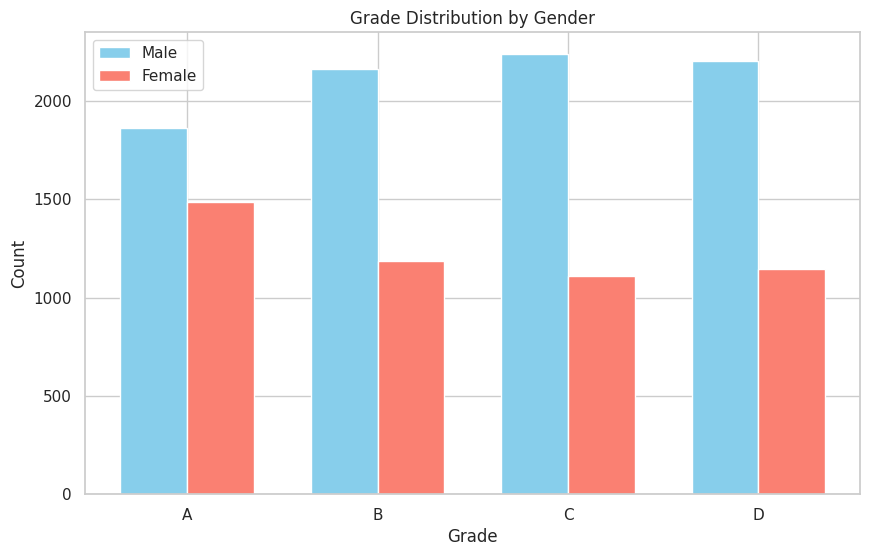

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

grade_gender_counts = df.groupby(['class', 'gender']).size().unstack(fill_value=0)

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))

bar_width = 0.35
grades = grade_gender_counts.index
index = range(len(grades))

plt.bar(index, grade_gender_counts['M'], bar_width, label='Male', color='skyblue')
plt.bar([i + bar_width for i in index], grade_gender_counts['F'], bar_width, label='Female', color='salmon')

plt.xlabel('Grade')
plt.ylabel('Count')
plt.title('Grade Distribution by Gender')
plt.xticks([i + bar_width / 2 for i in index], grades)
plt.legend()

plt.show()

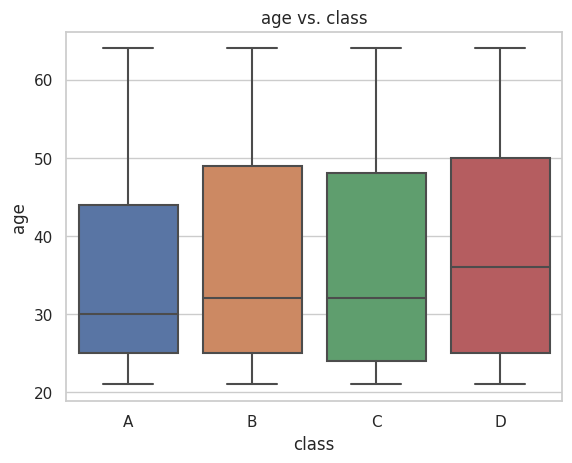

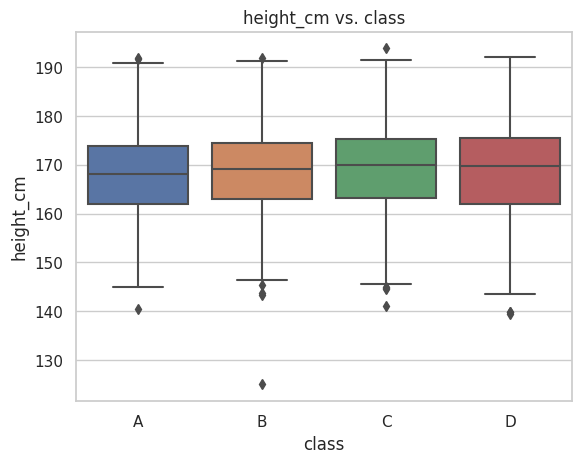

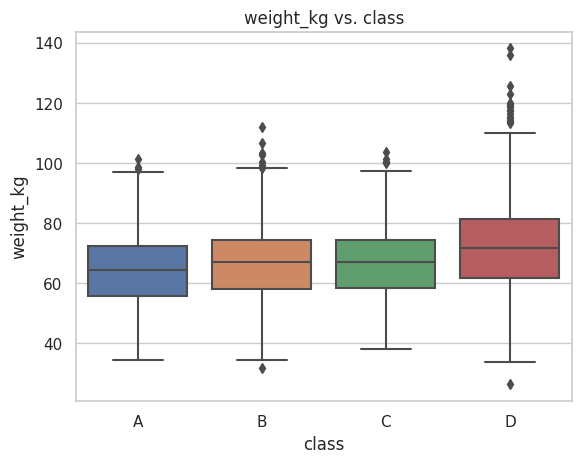

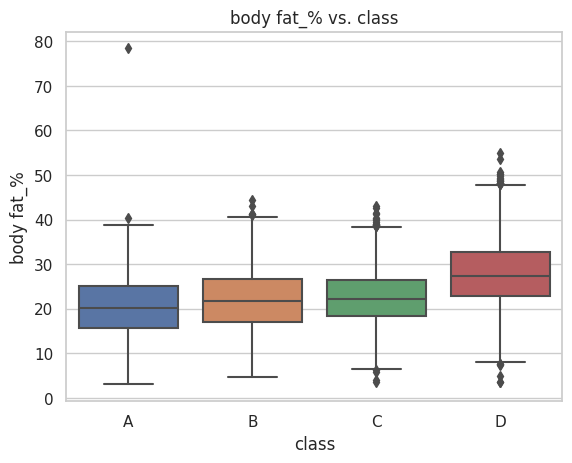

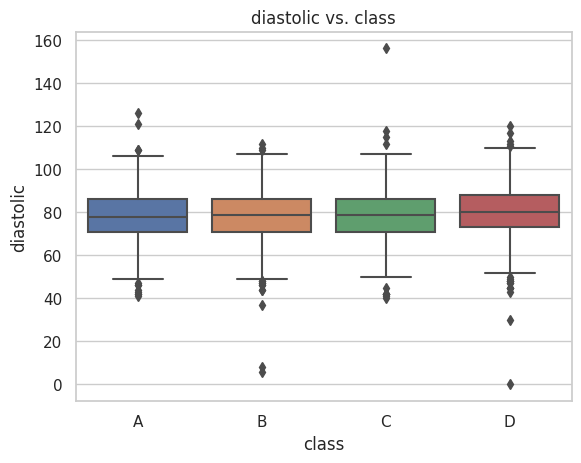

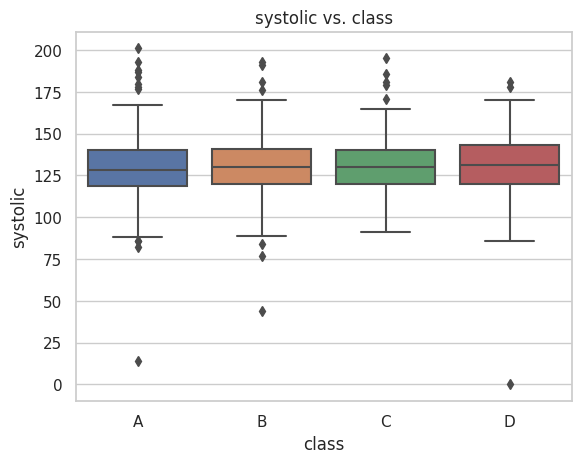

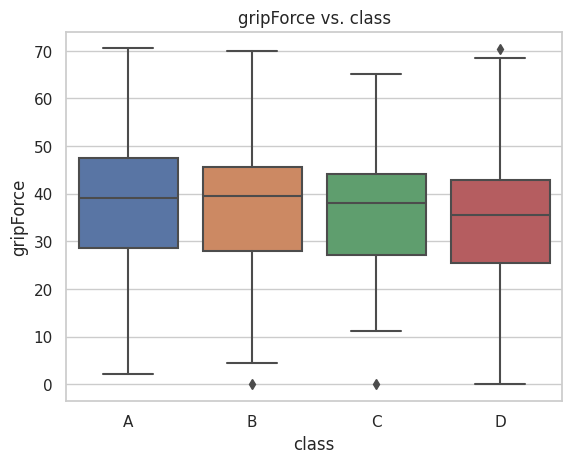

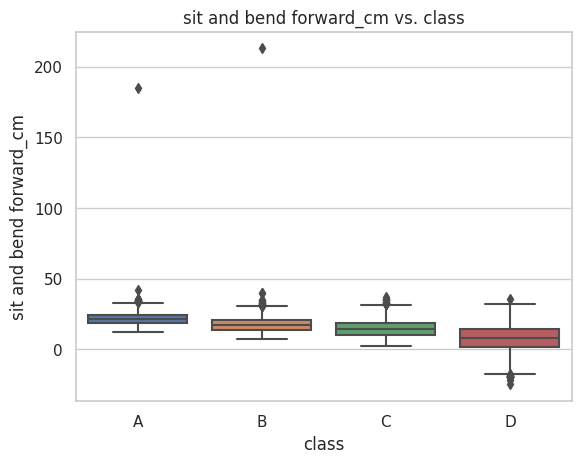

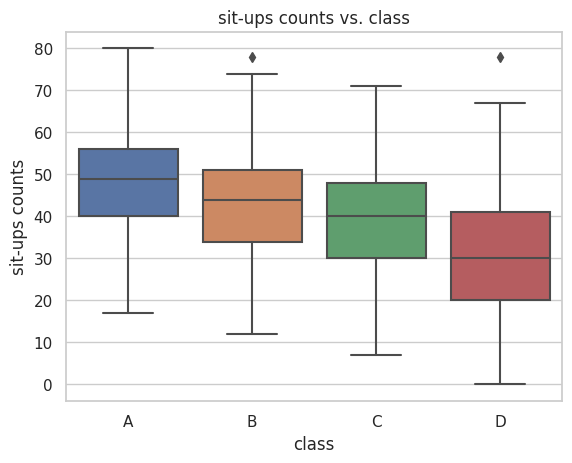

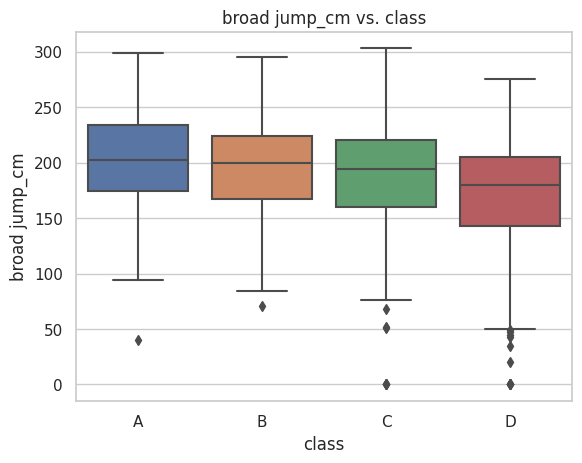

In [ ]:
grade_order = ['A', 'B', 'C', 'D']

numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
for column in numerical_columns:
    sns.boxplot(x='class', y=column, data=df, order=grade_order)
    plt.title(f'{column} vs. class')
    plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['gender'] = label_encoder.fit_transform(df['gender'])

df['class_encoded'] = label_encoder.fit_transform(df['class'])

In [ ]:
df.head(10)

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class,class_encoded
0,27.0,1,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C,2
1,25.0,1,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A,0
2,31.0,1,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C,2
3,32.0,1,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B,1
4,28.0,1,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B,1
5,36.0,0,165.4,55.40,22.0,64.0,119.0,23.8,21.0,27.0,153.0,B,1
6,42.0,0,164.5,63.70,32.2,72.0,135.0,22.7,0.8,18.0,146.0,D,3
7,33.0,1,174.9,77.20,36.9,84.0,137.0,45.9,12.3,42.0,234.0,B,1
8,54.0,1,166.8,67.50,27.6,85.0,165.0,40.4,18.6,34.0,148.0,C,2
9,28.0,1,185.0,84.60,14.4,81.0,156.0,57.9,12.1,55.0,213.0,B,1


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop(['class', 'class_encoded'], axis=1)
y = df['class_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn import preprocessing

models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
}

for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    print(f"Classification Report for {model_name}:")
    print(classification_report(y_test, y_pred))

    y_prob = model.predict_proba(X_test_scaled)
    n_classes = len(label_encoder.classes_)

    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(np.where(y_test == i, 1, 0), y_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    fpr["micro"], tpr["micro"], _ = roc_curve(label_binarize(y_test, classes=list(range(n_classes))).ravel(), y_prob.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    print(f"Micro-Average ROC AUC for {model_name}: {roc_auc['micro']:.2f}\n")


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.70      0.71      0.71       685
           1       0.45      0.44      0.45       662
           2       0.52      0.53      0.53       650
           3       0.79      0.78      0.78       682

    accuracy                           0.62      2679
   macro avg       0.62      0.62      0.62      2679
weighted avg       0.62      0.62      0.62      2679

Micro-Average ROC AUC for Logistic Regression: 0.87

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.74      0.70      0.72       685
           1       0.53      0.53      0.53       662
           2       0.57      0.59      0.58       650
           3       0.76      0.79      0.77       682

    accuracy                           0.65      2679
   macro avg       0.65      0.65      0.65      2679
weighted avg       0.65      0.65      0.65 